# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [ ]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 61.0 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 61.4 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.4 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 58.7 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 66.5 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 70.0 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 60.1 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 68.3 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 69.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 71.6 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 12.2 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 69.9 MB/s eta 0:00:01
     |██████████████████

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
# Define transforms
## YOUR CODE HERE ##
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

# Create training set and define training dataloader
training_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)
test_data = datasets.MNIST(root="data", train=False, download=True, transform=transform)

print(training_data)
print(test_data)

# Create test set and define test dataloader
train_loader = DataLoader(training_data, batch_size=96, shuffle=True)
test_loader = DataLoader(test_data, batch_size=96)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

0


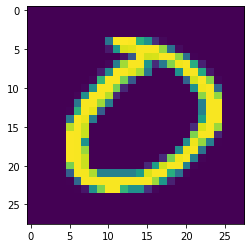

0


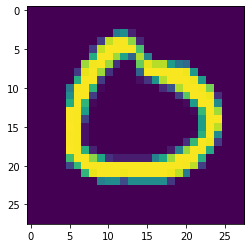

9


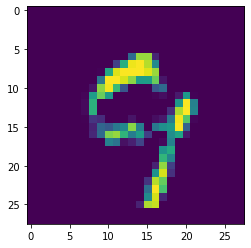

0


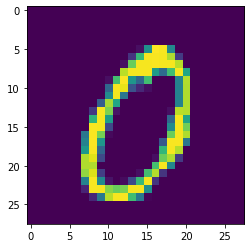

4


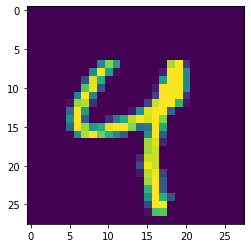

In [5]:
# Explore data
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [6]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        output_size = 10

        self.conv = nn.Sequential(
                        nn.Conv2d(1, 32, 5, 1),
                        nn.ReLU(),
                        nn.Dropout(0.2),
                        nn.MaxPool2d(kernel_size=2, stride=2),
                        nn.Conv2d(32, 128, 5, 1),
                        nn.ReLU(),
                        nn.Dropout(0.2),
                        nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.linear = nn.Sequential(
                        nn.Flatten(),
                        nn.Linear(2048, 256),
                        nn.ReLU(),
                        nn.Linear(256, 32),
                        nn.Linear(32, output_size),
        )
        
    def forward(self,x):
        x = self.conv(x)
        return self.linear(x)
    
model = Model()
model.to(device)

Model(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 128, kernel_size=(5, 5), stride=(1, 1))
    (5): ReLU()
    (6): Dropout(p=0.2, inplace=False)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2048, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=32, bias=True)
    (4): Linear(in_features=32, out_features=10, bias=True)
  )
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [7]:
# Choose an optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Choose a loss function
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [8]:
num_epochs = 10

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        # Zero out the gradients of the optimizer
        optimizer.zero_grad()
        # Get the outputs of your model and compute your loss
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Compute the loss gradient using the backward method and have the optimizer take a step
        loss.backward()
        #for name, param in model.named_parameters():
        #    print(name, param.grad)
        optimizer.step()

        # Compute the accuracy and print the accuracy and loss
        _, pred = torch.max(outputs.data, 1)
        train_correct += pred.eq(labels.view_as(pred)).sum().item()
        train_loss += loss.item()

    print(train_correct, len(train_loader))
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))

    # The validation step is done for you.
    val_loss = 0.0
    val_correct = 0
    model.eval()
    for inputs, labels in test_loader:
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        _, pred = torch.max(outputs.data, 1)
        val_correct += pred.eq(labels.view_as(pred)).sum().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(test_loader):.2f}% validation loss: {val_loss/len(test_loader):.5f}')
    val_loss_history.append(val_loss/len(test_loader))

57326 625
Epoch 1 training accuracy: 91.72% training loss: 0.14479
Epoch 1 validation accuracy: 93.29% validation loss: 0.06519
59160 625
Epoch 2 training accuracy: 94.66% training loss: 0.04374
Epoch 2 validation accuracy: 94.06% validation loss: 0.04146
59430 625
Epoch 3 training accuracy: 95.09% training loss: 0.03082
Epoch 3 validation accuracy: 94.41% validation loss: 0.03065
59554 625
Epoch 4 training accuracy: 95.29% training loss: 0.02403
Epoch 4 validation accuracy: 94.50% validation loss: 0.02688
59624 625
Epoch 5 training accuracy: 95.40% training loss: 0.01899
Epoch 5 validation accuracy: 94.31% validation loss: 0.02882
59652 625
Epoch 6 training accuracy: 95.44% training loss: 0.01827
Epoch 6 validation accuracy: 94.29% validation loss: 0.03134
59710 625
Epoch 7 training accuracy: 95.54% training loss: 0.01541
Epoch 7 validation accuracy: 94.58% validation loss: 0.02355
59751 625
Epoch 8 training accuracy: 95.60% training loss: 0.01352
Epoch 8 validation accuracy: 94.19% v

Plot the training loss (and validation loss/accuracy, if recorded).

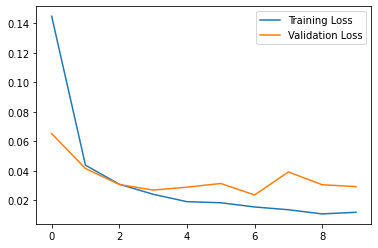

In [9]:
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [10]:
## YOUR CODE HERE ##
test_loss = 0.0
test_correct = 0
model.eval()
for inputs, labels in test_loader:
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        _, pred = torch.max(outputs.data, 1)
        test_correct += pred.eq(labels.view_as(pred)).sum().item()
        test_loss += loss.item()
print(test_correct, len(test_loader))
print(pred.eq(labels.view_as(pred)))
print(pred)

print(f'Epoch {epoch + 1} validation accuracy: {test_correct/len(test_loader):.2f}% validation loss: {test_loss/len(test_loader):.5f}')


9905 105
tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True], device='cuda:0')
tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6], device='cuda:0')
Epoch 10 validation accuracy: 94.33% validation loss: 0.02924


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [11]:
## YOUR CODE HERE ##

## Saving your model
Using `torch.save`, save your model for future loading.

In [12]:
# Specify a path
PATH = "state_dict_model.pt"

# Save
torch.save(model.state_dict(), PATH)